# ❤️ Predicting Heart Disease Using Machine Learning  

This project explores how to leverage **Python-based machine learning** and **data science libraries** to build a predictive model that determines whether an individual is likely to have **heart disease** based on their medical attributes.  

The goal is to apply a structured **data science workflow** to transform raw medical data into actionable insights and predictive power.  

---

## 🔍 Approach  

To ensure a clear and systematic process, the following steps were followed:  

1. **📝 Problem Definition**  
   Define the challenge: *Can we predict whether a patient has heart disease given their medical features?*  

2. **📊 Data Collection & Understanding**  
   Explore the dataset, identify patterns, handle missing values, and prepare it for analysis.

   The original data came from the Cleavland data from the UCI Machine Learning Repository.

   https://archive.ics.uci.edu/ml/datasets/heart+Disease

   There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset


4. **📈 Evaluation**  
   Determine the success metric (e.g., accuracy, precision, recall, F1-score) to evaluate model performance.
   >If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we can pursue the         project.

6. **⚙️ Features**  
   Select and engineer the most relevant attributes that contribute to prediction.

   Create data dictionary


    ### 📌 Dataset Features  

    Below are the key features in the dataset along with their descriptions:  
    
    1. **age** – Age in years.  
    
    2. **sex** – Biological sex (1 = male, 0 = female).  
    
    3. **cp** – Chest pain type:  
       - 0: Typical angina → chest pain related to reduced blood supply to the heart  
       - 1: Atypical angina → chest pain not related to the heart  
       - 2: Non-anginal pain → often due to esophageal spasms (non-heart related)  
       - 3: Asymptomatic → chest pain not showing signs of disease  
    
    4. **trestbps** – Resting blood pressure (in mm Hg upon hospital admission).  
       - Normal: ~120 mm Hg  
       - Concern: ≥130–140 mm Hg  
    
    5. **chol** – Serum cholesterol in mg/dl.  
       - Formula: LDL + HDL + 0.2 × triglycerides  
       - Concern: >200 mg/dl  
    
    6. **fbs** – Fasting blood sugar (>120 mg/dl).  
       - 1 = True  
       - 0 = False  
       - Note: >126 mg/dl indicates diabetes  
    
    7. **restecg** – Resting electrocardiographic results:  
       - 0: Normal (nothing to note)  
       - 1: ST-T wave abnormality → from mild to severe irregularities in heart rhythm  
       - 2: Possible or definite left ventricular hypertrophy → enlargement of the heart’s main pumping chamber  
    
    8. **thalach** – Maximum heart rate achieved.  
    
    9. **exang** – Exercise-induced angina (1 = Yes, 0 = No).  
    
    10. **oldpeak** – ST depression induced by exercise relative to rest.  
        - Higher values indicate higher stress on the heart.  
    
    11. **slope** – Slope of the peak exercise ST segment:  
        - 0: Upsloping → better heart rate with exercise (rare)  
        - 1: Flatsloping → minimal change (typical healthy heart)  
        - 2: Downsloping → signs of an unhealthy heart  
    
    12. **ca** – Number of major vessels (0–3) colored by fluoroscopy.  
        - Colored = blood flow visible (healthy)  
        - More vessels colored = better circulation  
    
    13. **thal** – Thallium stress test result:  
        - 1, 3: Normal  
        - 6: Fixed defect (previous defect but currently stable)  
        - 7: Reversible defect (poor blood movement during exercise)  
    
    14. **target** – Presence of heart disease (predicted attribute).  
        - 1 = Yes (disease present)  
        - 0 = No (no disease)  

        


8. **🤖 Modelling**  
   Apply different machine learning algorithms, train the models, and compare their performance.  

9. **🧪 Experimentation & Optimization**  
   Tune hyperparameters, improve performance, and document insights from experimentation.  

---

✨ With this workflow, the project aims not only to build a robust predictive model but also to showcase best practices in **data preprocessing, model selection, and evaluation** in machine learning.  


# 🛠️ Preparing the Tools  

For this project, we will leverage key Python libraries for **data analysis, visualization, and numerical computation**:  

- **pandas** → for data loading, cleaning, and manipulation  
- **NumPy** → for efficient numerical operations and mathematical computations  
- **Matplotlib** → for creating insightful visualizations and plots  

These tools form the backbone of our data science workflow, enabling us to preprocess the dataset, explore patterns, and build a strong foundation for machine learning.  


In [1]:
# Importing all the necessary tools

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# magic command in jupyter notebook(showing the plot inside the notebook)
%matplotlib inline

# Model from scikitlearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## 🔎 Data Exploration (Exploratory Data Analysis – EDA)  

The purpose of **Exploratory Data Analysis (EDA)** is to develop a deeper understanding of the dataset and become familiar with the domain before building models. This step helps identify patterns, anomalies, and insights that guide the overall workflow.  

Key questions we aim to answer during EDA include:  

1. **❓ What problem are we trying to solve?**  
   - Define the research question and align it with the dataset’s scope.  

2. **📊 What type of data do we have?**  
   - Identify numerical, categorical, and ordinal variables.  
   - Decide how to process and treat each type.  

3. **⚠️ What’s missing from the data?**  
   - Detect missing values and decide on strategies (imputation, removal, or replacement).  

4. **📉 Where are the outliers?**  
   - Locate unusual values that may distort analysis.  
   - Understand their impact and whether they should be kept, corrected, or removed.  

5. **🛠️ How can features be engineered?**  
   - Add, modify, or remove features to improve the dataset’s predictive power.  
   - Create domain-specific features that may boost model performance.  

---

✨ By answering these questions, EDA ensures the dataset is **clean, well-understood, and ready** for the modelling phase.  


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Checking the empty or null value in our dataset
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Checking out how many of each class is there 
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

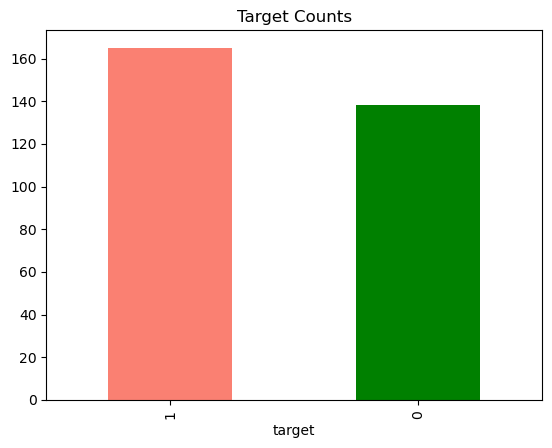

In [7]:
# plotting the value of our target 
df['target'].value_counts().plot(kind='bar',color=['salmon','Green'],title='Target Counts')
plt.show()

In [8]:
# information of our dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequence according to Sex

In [10]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Comparing the target column with sex column

pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


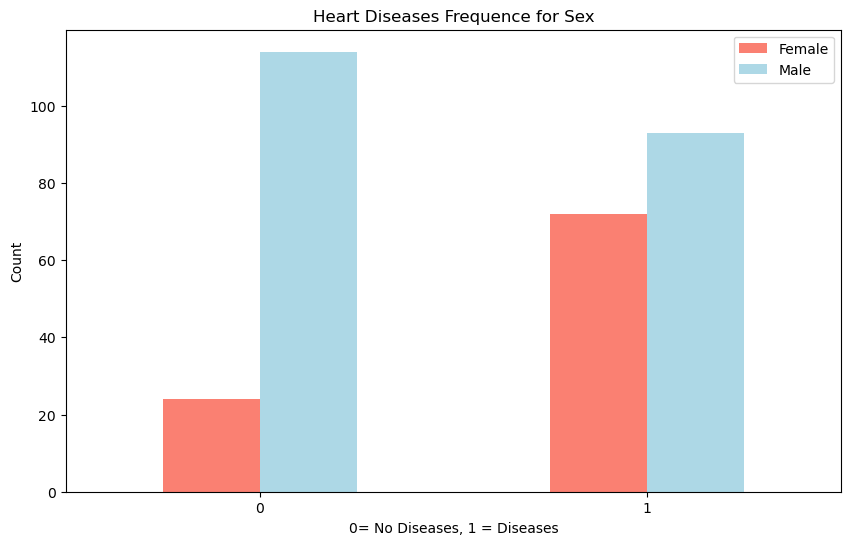

In [12]:
# Creating a plot of the crosstab

pd.crosstab(df.target,df.sex).plot(
    kind='bar',
    figsize=(10,6),
    color=['salmon','lightblue'],
)
plt.title('Heart Diseases Frequence for Sex')
plt.xlabel("0= No Diseases, 1 = Diseases")
plt.ylabel('Count')
plt.legend(['Female','Male'])
plt.xticks(rotation=0)
plt.show()

### Age vs Max heart rate for heart disease

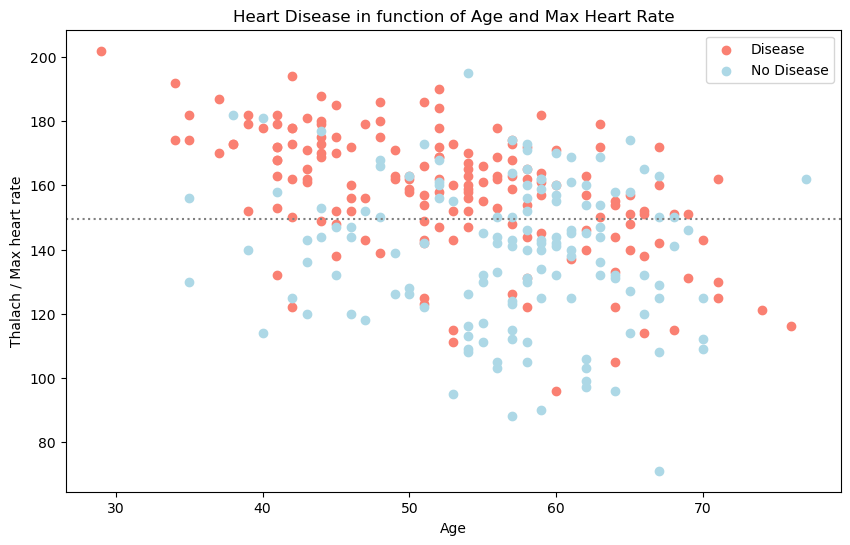

In [13]:
# creating a figure
plt.figure(figsize=(10,6))

# scatter with positive examples
#df.age[df.target == 1] => people with age that have positive heart disease
plt.scatter(x= df.age[df.target == 1],
           y=df.thalach[df.target == 1],
           color=['salmon'])

# scatter with negative examples
plt.scatter(x= df.age[df.target == 0],
           y = df.thalach[df.target == 0],
           color = ['lightblue']
           )

# customizing the chart
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Thalach / Max heart rate')
plt.legend(['Disease','No Disease'])
plt.axhline(y=df.thalach.mean(),color='grey',linestyle=':')

# show 
plt.show()

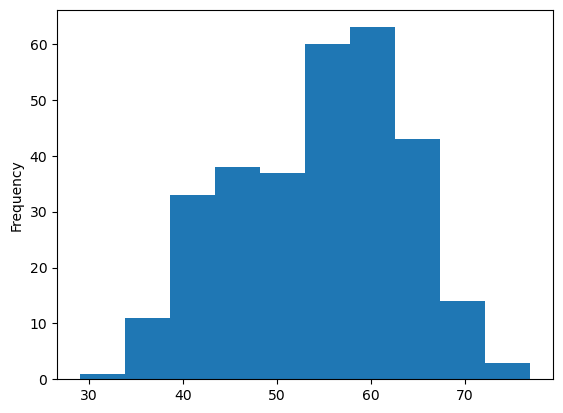

In [14]:
# Checking the distribution of age column with histogram

df.age.plot(kind='hist')
plt.show()

### ❤️ Feature: Chest Pain Type (`cp`)

This feature describes the **type of chest pain** experienced by the patient:

- 🟥 **0: Typical Angina** → Chest pain related to **reduced blood supply** to the heart.  
- 🟧 **1: Atypical Angina** → Chest pain **not directly related** to the heart.  
- 🟨 **2: Non-Anginal Pain** → Often caused by issues such as **esophageal spasms** (non-heart related).  
- 🟩 **3: Asymptomatic** → No typical chest pain symptoms, but may still indicate underlying disease.  


In [15]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


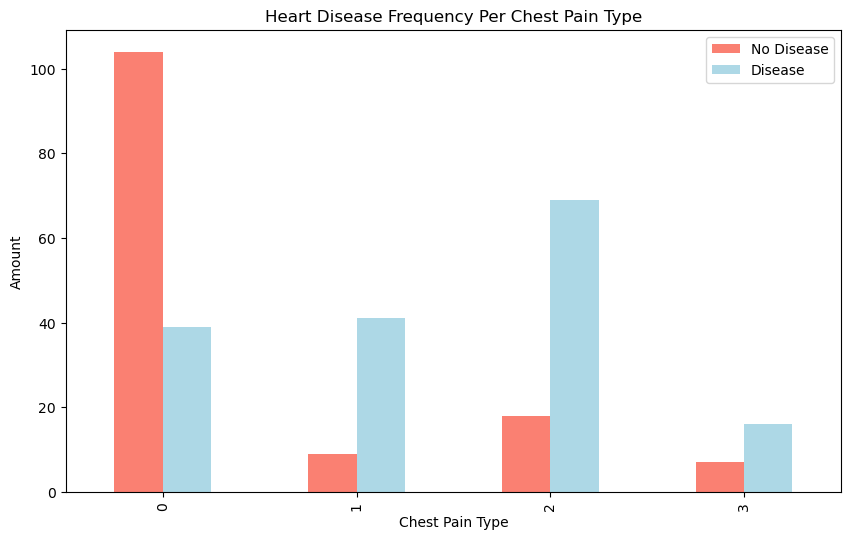

In [16]:
# Making the cross tab visual
pd.crosstab(df.cp,df.target).plot(
    kind='bar',
    figsize=(10,6),
    color=['salmon','lightblue']
)

# customizing
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])


plt.show()

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


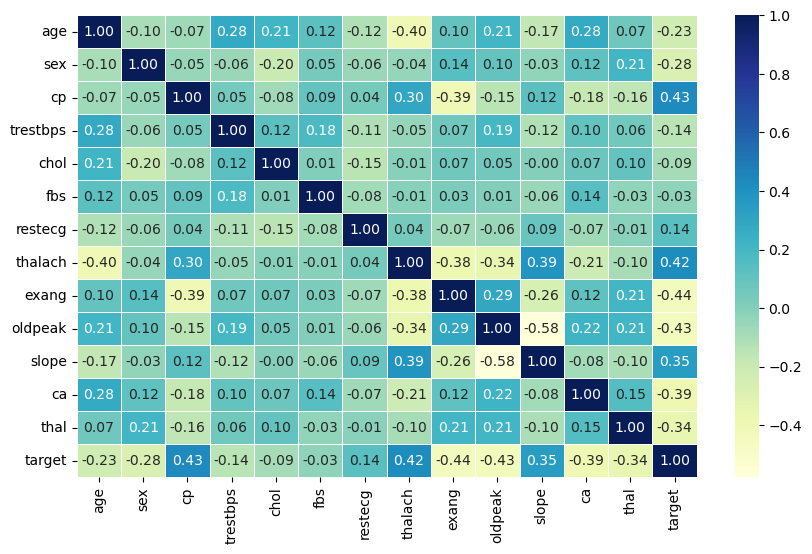

In [19]:
# Let's make our co-relation matrix a little prettier

corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10, 6)) 

ax = sns.heatmap(
    corr_matrix,
    annot=True,
    linewidths=0.5,
    fmt='.2f',
    #colormap
    cmap='YlGnBu'            
)

plt.show()


## Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Splitting the data into X(Independent Features) and y(Dependent Features)

X = df.drop('target',axis=1)
y = df['target']


In [22]:
# Splitting the data into train and test sets
np.random.seed(42)

# Split it into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2)


In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [24]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

### 🚀 Building and Evaluating Machine Learning Models  

Now that we’ve successfully **split our dataset** into **training** and **test sets**, it’s time to move on to the next step: **model building**.  

- 🏋️ **Training Set** → Used to **train** the model (learn patterns).  
- 🧪 **Test Set** → Used to **evaluate** the model (check how well it generalizes).  

We’ll experiment with **three different machine learning algorithms** to compare their performance:  

1. 📊 **Logistic Regression**  
2. 🤝 **K-Nearest Neighbours (KNN) Classifier**  
3. 🌲 **Random Forest Classifier**  

By testing these models, we’ll be able to identify which one performs best on our dataset.  


In [25]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

In [27]:
model_compare = pd.DataFrame(model_scores,index=['Score']).T
model_compare

,Score
Logistic Regression,0.885246
KNN,0.688525
Random Forest,0.836066


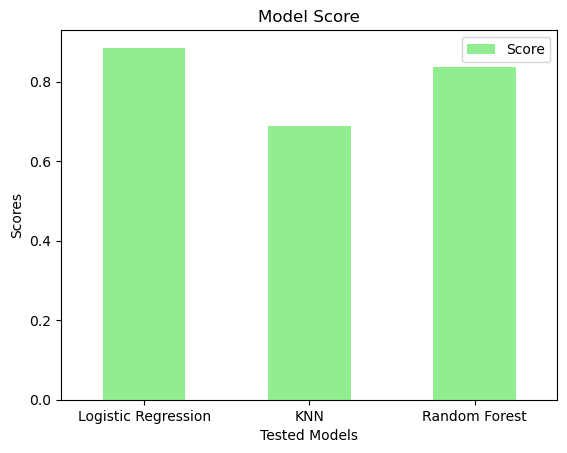

In [28]:
model_compare.plot(
    kind='bar',
    title = 'Model Score',
    color = ['lightgreen']
)
plt.xlabel('Tested Models')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.show()

# 🔎 Next Steps After Building a Baseline Model

Now that we’ve got a **baseline model**, it’s important to remember:  
➡️ A model’s **first predictions** aren’t always the ones we should base our next steps on.  

To improve and properly evaluate our model, we’ll look at the following:

---

## ⚙️ Model Improvement
- **Hyperparameter Tuning** → Optimize parameters to boost performance.  
- **Feature Importance** → Identify which features contribute the most.  

---

## 📊 Model Evaluation
- **Confusion Matrix** → Visualize predictions vs. actual values.  
- **Cross-Validation** → Ensure results are consistent across different subsets of data.  

---

## 🎯 Performance Metrics
- **Precision** → Of the predicted positives, how many are correct?  
- **Recall** → Of all actual positives


### ⚙️ Model Improvement (Hyperparameter tuning)

In [29]:
# 1. Using KNN

train_scores = []
test_scores = []

# Creating a list of different values for n_neigbhours
neighbours = range(1,21)

# Setting up an instance 
knn = KNeighborsClassifier()

# Loop through different n_neigbours
for i in neighbours:
    knn.set_params(n_neighbors = i)

    # Fitting the algorithm
    knn.fit(X_train,y_train)

    # Update the training score list 
    train_scores.append(knn.score(X_train,y_train))

    # Update the testing score list 
    test_scores.append(knn.score(X_test,y_test))
    

In [30]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [31]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

✅ Maximum KNN Score on the test data: 75.41% (at K=11)


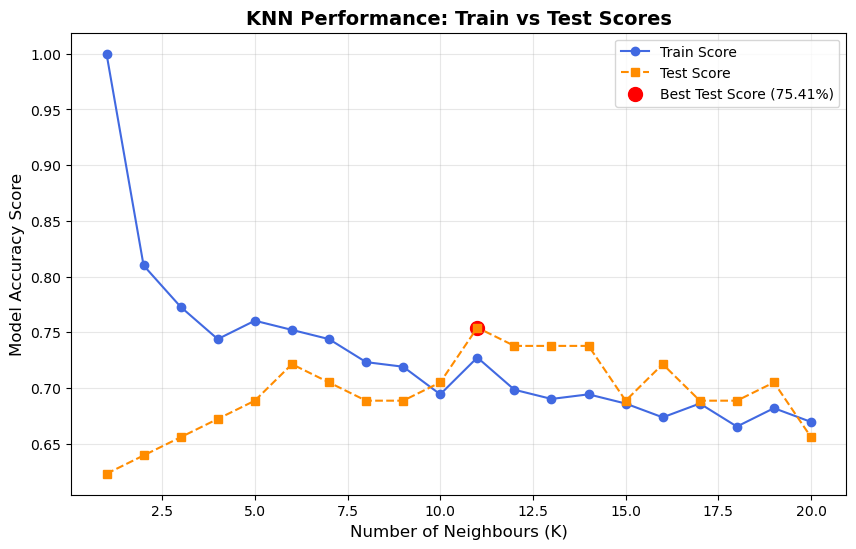

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(neighbours, train_scores, marker='o', linestyle='-', label='Train Score', color='royalblue')
plt.plot(neighbours, test_scores, marker='s', linestyle='--', label='Test Score', color='darkorange')

# Title & labels
plt.title('KNN Performance: Train vs Test Scores', fontsize=14, fontweight='bold')
plt.xlabel('Number of Neighbours (K)', fontsize=12)
plt.ylabel('Model Accuracy Score', fontsize=12)

# Grid & legend
plt.grid(alpha=0.3)
plt.legend(fontsize=11, loc='best')

# Highlight maximum test score
best_k = neighbours[test_scores.index(max(test_scores))]
best_score = max(test_scores)
plt.scatter(best_k, best_score, color='red', s=100, label=f'Best Test Score ({best_score*100:.2f}%)')
plt.legend()

# Show result
print(f"✅ Maximum KNN Score on the test data: {best_score*100:.2f}% (at K={best_k})")
plt.show()


# 🎯 Hyperparameter Tuning with RandomizedSearchCV

To improve our models beyond the baseline, we’ll perform **hyperparameter tuning** using **RandomizedSearchCV**.  

We’ll focus on tuning the following models:  

- 📊 **Logistic Regression** (`LogisticRegression()`)  
- 🌲 **Random Forest Classifier** (`RandomForestClassifier()`)  

This process helps us:  
- 🔧 Find the **best set of parameters**  
- 📈 Improve model **accuracy and generalization**  
- ⏱️ Save time compared to GridSearchCV by sampling a random subset of parameters  


1 📊 **Logistic Regression** (`LogisticRegression()`)  

In [33]:
# Creating a hyperparameters for logisticRegression
# np.logspace() -> generates value from 10^-4 to 10^4
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":['liblinear']
               }

# Creating a hyperparameters for RandomForestClassifier
rf_grid = {
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}

In [34]:
# Tunning the logistic Regression
np.random.seed(42)

# Randomized Search CV
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fitting random hyperparameter search model for logisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [36]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

2 🌲 **Random Forest Classifier** (`RandomForestClassifier()`)  


In [37]:
# Tunning the Random Forest Classifier
np.random.seed(42)

# Randomized Search CV
rs_random_forest = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fitting random hyperparameter search model for logisticRegression
rs_random_forest.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [38]:
rs_random_forest.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [39]:
rs_random_forest.score(X_test,y_test)

0.8688524590163934

# 🎯 Hyperparameter Tuning with GridSearchCV

Since our **Logistic Regression** model has achieved the **best performance so far**, the next step is to **further optimize its hyperparameters** using **GridSearchCV**.  

**Why GridSearchCV?**  
- Exhaustively searches over a specified parameter grid  
- Finds the **best combination of hyperparameters** for maximum model performance  
- Ensures robust evaluation with **cross-validation**  

This process helps us push our baseline model even further and ensures that we are using the most effective configuration for our dataset.

1 📊 **Logistic Regression** (`LogisticRegression()`)  

In [40]:
# Different hyperparameters for our logistics regression model 
lg_reg_grid = {
    'C':np.logspace(-4,4,30),
    'solver':['liblinear']
}

# Setting up grid hyperparameter search for logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         lg_reg_grid,
                         cv=5,
                         verbose=True)

# Fitting the grid hyperparameter search model 
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [41]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

# 📊 Evaluating Our Tuned Machine Learning Classifier

Once our model has been **tuned**, it’s important to evaluate its performance **beyond just accuracy**.  

Key evaluation tools include:  

- **ROC Curve & AUC Score** → Assess the trade-off between True Positive Rate and False Positive Rate  
- **Confusion Matrix** → Visualize true vs. predicted labels  
- **Classification Report** → Includes Precision, Recall, and F1-score for each class  
- **Precision** → Proportion of predicted positives that are actually correct  
- **Recall** → Proportion of actual positives that are correctly identified  
- **F1-Score** → Harmonic mean of Precision and Recall  
- **Cross-Validation** → Ensures consistent performance across multiple subsets of the data  

---

## 🔹 Making Predictions

To make meaningful comparisons and properly evaluate our **trained model**, the first step is to **generate predictions** on the test set.  

This provides the foundation for computing all the metrics listed above and understanding how well the model generalizes to unseen data.


In [43]:
# Making predictions with tuned model 

y_preds= gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [44]:
y_preds.shape

(61,)

In [45]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

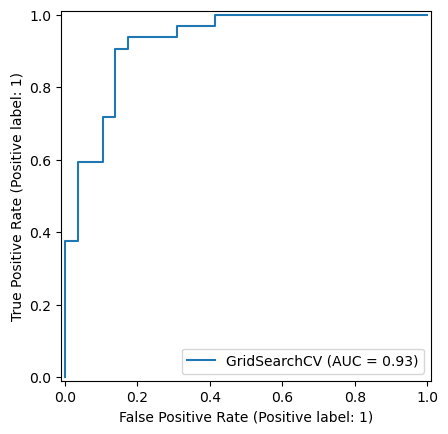

In [52]:
# plot ROC curve and calculate AUC metric

RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)
plt.show()

In [53]:
# Confusion matrix 

print(confusion_matrix(y_test,y_pred=y_preds))

[[25  4]
 [ 3 29]]


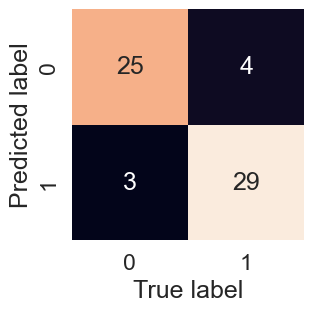

In [67]:
sns.set(font_scale = 1.5)

def plot_conf_matrix(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(
        confusion_matrix(y_test,y_preds),
        annot=True,
        cbar=False
    ) 
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    plt.show()

plot_conf_matrix(y_test, y_preds)

In [69]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate the evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [70]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [71]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [72]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [74]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8479781420765027)

In [75]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

np.float64(0.8215873015873015)

In [76]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9272727272727274)

In [77]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8705403543192143)

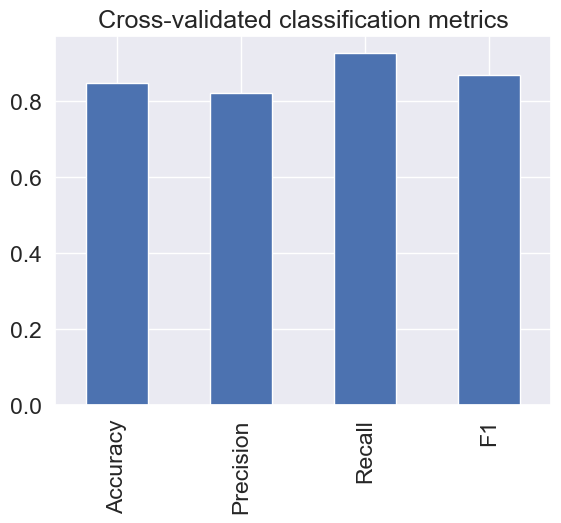

In [84]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

plt.show()

## Feature Importance in Machine Learning Models

Feature importance helps us answer the question:  
**"Which features contributed the most to the model’s predictions, and how did they contribute?"**

The approach to determining feature importance depends on the type of machine learning model being used. Different models expose different methods or attributes for this purpose. A practical way to discover the correct approach is to search for:  
`<model name> feature importance`.

---

### Logistic Regression Feature Importance

For **Logistic Regression**, feature importance is typically derived from the model’s coefficients.  
- A **positive coefficient** indicates that as the feature increases, the likelihood of the positive class also increases.  
- A **negative coefficient** suggests the opposite effect.  
- The **magnitude of the coefficient** reflects the strength of the influence, though scaling of features should be considered for fair comparison.

In the following section, we will compute and visualize the feature importance for our tuned Logistic Regression model.


In [85]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [86]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')
clf.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.20433597178569418
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [88]:
# checking coef
clf.coef_

array([[ 0.00316728, -0.86044654,  0.66067039, -0.01156993, -0.00166374,
         0.04386106,  0.3127585 ,  0.02459361, -0.60413082, -0.56862801,
         0.45051629, -0.63609898, -0.67663371]])

In [89]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [91]:
# Matching the co-efficient of feature to the column
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672803473471746),
 'sex': np.float64(-0.8604465397334717),
 'cp': np.float64(0.6606703933230701),
 'trestbps': np.float64(-0.011569932224142465),
 'chol': np.float64(-0.0016637439444753457),
 'fbs': np.float64(0.043861055458486765),
 'restecg': np.float64(0.31275849953638685),
 'thalach': np.float64(0.0245936131980898),
 'exang': np.float64(-0.604130820900716),
 'oldpeak': np.float64(-0.5686280121446481),
 'slope': np.float64(0.45051628712277775),
 'ca': np.float64(-0.6360989818014864),
 'thal': np.float64(-0.6766337106855729)}

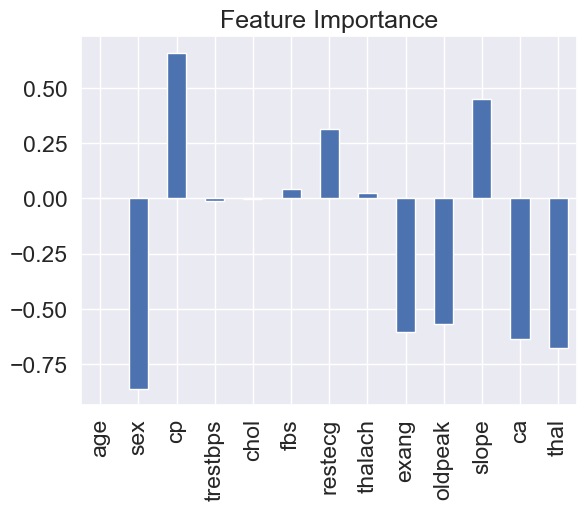

In [95]:
# Visualize the feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)
plt.show()